# Imports

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import beta
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns


# Simulation Data Plots

In [21]:
from google.colab import drive
drive.mount('/content/drive')

save_path = '/content/drive/MyDrive/Colab Notebooks/USC-research/bayesian/'

Mounted at /content/drive


In [22]:
input_path_randomness = save_path + 'simulation_results2.csv'
input_path_movie_size = save_path + 'simulation_results_movie_catalog2.csv'
input_path_rating_num = save_path + 'simulation_results_rating_num2.csv'
input_path_time = save_path + 'simulation_results_time2.csv'

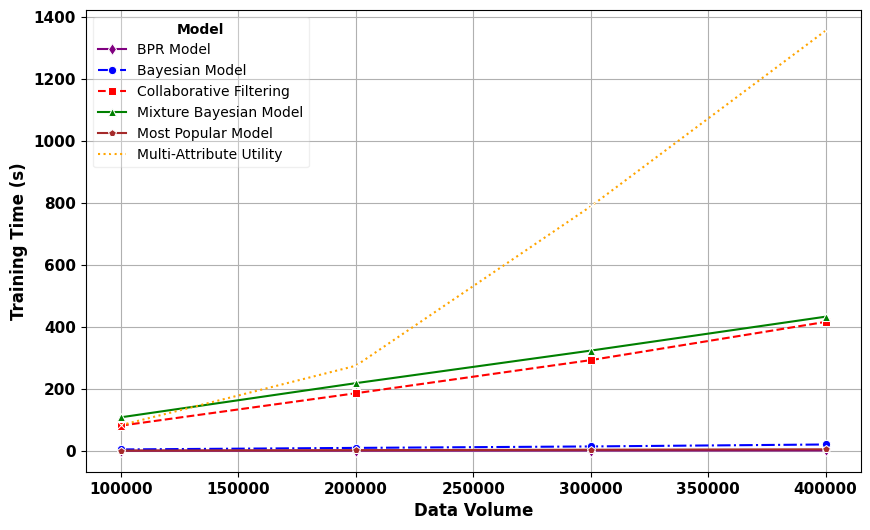

In [23]:
# Load the data
result_df = pd.read_csv(input_path_time)

# Filter the DataFrame for the specific configuration if needed (you can adjust or remove this part)
filtered_df = result_df

# Group by model_name and data_volume, then calculate the average of training time
grouped_df = filtered_df.groupby(['model_name', 'data_volume']).mean().reset_index()

# Define custom styles for each model, including MostPopularModel
model_styles = {
    'BayesianRecommendationModel': ('-.', 'o'),
    'CollaborativeFilteringModel': ('--', 's'),
    'MultiAttributeUtilityModel': (':', 'x'),
    'MixtureBetaRecommendationModel': ('-', '^'),
    'BPRModel': ('-', 'd'),
    'MostPopularModel': ('-', 'p')  # Added style for MostPopularModel
}

model_palette = {
    'BayesianRecommendationModel': 'blue',
    'CollaborativeFilteringModel': 'red',
    'MultiAttributeUtilityModel': 'orange',
    'MixtureBetaRecommendationModel': 'green',
    'BPRModel': 'purple',
    'MostPopularModel': 'brown'  # Added color for MostPopularModel
}

model_labels = {
    'BayesianRecommendationModel': 'Bayesian Model',
    'CollaborativeFilteringModel': 'Collaborative Filtering',
    'MultiAttributeUtilityModel': 'Multi-Attribute Utility',
    'MixtureBetaRecommendationModel': 'Mixture Bayesian Model',
    'BPRModel': 'BPR Model',
    'MostPopularModel': 'Most Popular Model'  # Added label for MostPopularModel
}

# Plotting function for Training Time vs. Data Volume
def plot_metric(grouped_df, metric, ylabel, filename):
    plt.figure(figsize=(10, 6))
    for model_name in grouped_df['model_name'].unique():
        model_df = grouped_df[grouped_df['model_name'] == model_name]
        line_style, marker_style = model_styles[model_name]
        sns.lineplot(
            data=model_df,
            x='data_volume',
            y=metric,
            label=model_labels[model_name],
            color=model_palette[model_name],
            linestyle=line_style,
            marker=marker_style
        )
    plt.xlabel('Data Volume', fontweight='bold', fontsize=12)
    plt.ylabel(ylabel, fontweight='bold', fontsize=12)

    # Update legend with bold fonts
    legend = plt.legend(title='Model')
    legend.get_frame().set_alpha(0.3)  # Set opacity to 70%

    # Update legend and ticks to be bold
    legend.get_title().set_fontweight('bold')
    plt.xticks(fontweight='bold', fontsize=11)
    plt.yticks(fontweight='bold', fontsize=11)

    plt.grid(True)
    plt.savefig(save_path + 'figs/' + filename, format='jpg', dpi=300)  # Save the plot as a jpg file
    plt.show()
    plt.close()

# Plotting and saving the training time vs. data volume plot
plot_metric(grouped_df, 'training_time', 'Training Time (s)', 'training_time_vs_data_volume.jpg')

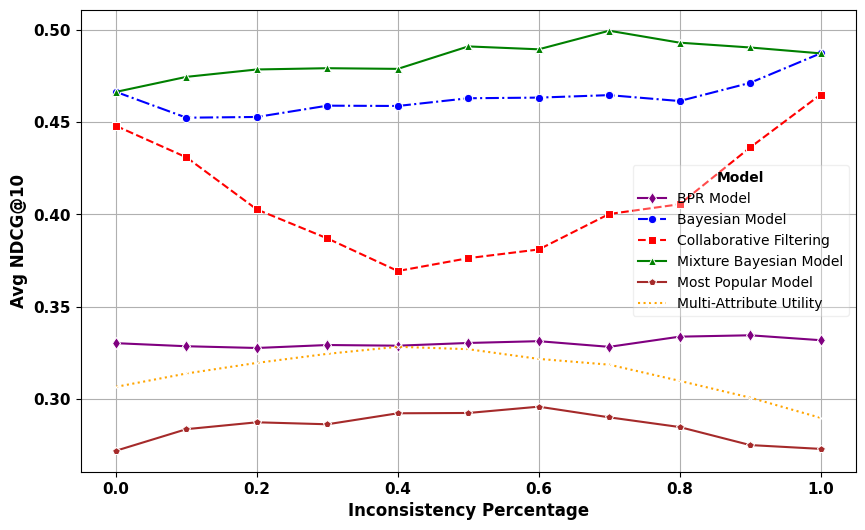

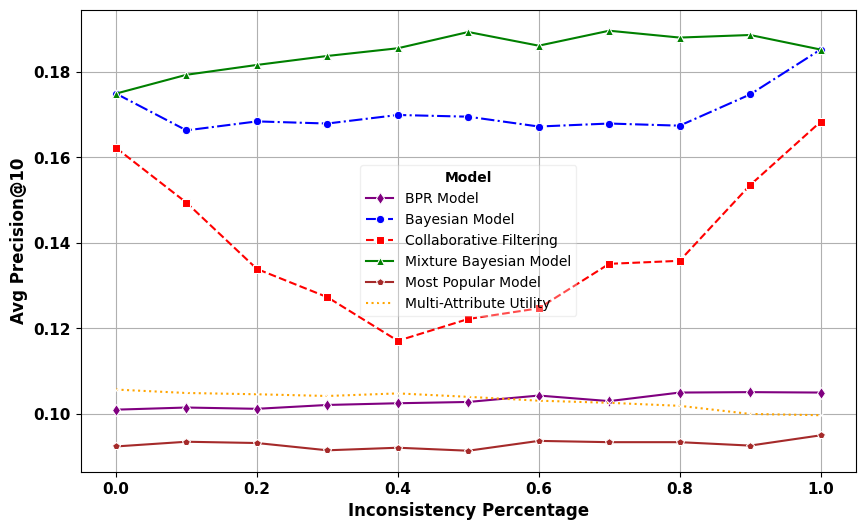

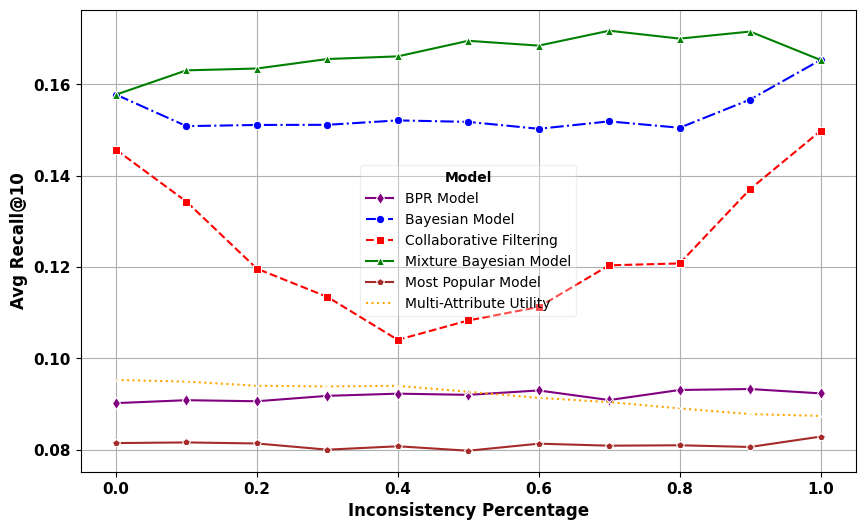

In [24]:
# Load the data
result_df = pd.read_csv(input_path_randomness)

# Filter the DataFrame for the specific configuration
filtered_df = result_df[
    (result_df['num_movies'] == 200) &
    (result_df['num_users'] == 1000) &
    (result_df['num_ratings_per_user'] == 100)
]

# Group by model_name and randomness, then calculate the average of NDCG, precision, and recall
grouped_df = filtered_df.groupby(['model_name', 'randomness']).mean().reset_index()

# Define custom styles for each model, including MostPopularModel
model_styles = {
    'BayesianRecommendationModel': ('-.', 'o'),
    'CollaborativeFilteringModel': ('--', 's'),
    'MultiAttributeUtilityModel': (':', 'x'),
    'MixtureBetaRecommendationModel': ('-', '^'),
    'BPRModel': ('-', 'd'),
    'MostPopularModel': ('-', 'p')  # Added style for MostPopularModel
}

model_palette = {
    'BayesianRecommendationModel': 'blue',
    'CollaborativeFilteringModel': 'red',
    'MultiAttributeUtilityModel': 'orange',
    'MixtureBetaRecommendationModel': 'green',
    'BPRModel': 'purple',
    'MostPopularModel': 'brown'  # Added color for MostPopularModel
}

model_labels = {
    'BayesianRecommendationModel': 'Bayesian Model',
    'CollaborativeFilteringModel': 'Collaborative Filtering',
    'MultiAttributeUtilityModel': 'Multi-Attribute Utility',
    'MixtureBetaRecommendationModel': 'Mixture Bayesian Model',
    'BPRModel': 'BPR Model',
    'MostPopularModel': 'Most Popular Model'  # Added label for MostPopularModel
}

# Plotting function for NDCG, Precision, and Recall with saving option
def plot_metric(grouped_df, metric, ylabel, filename):
    plt.figure(figsize=(10, 6))
    for model_name in grouped_df['model_name'].unique():
        model_df = grouped_df[grouped_df['model_name'] == model_name]
        line_style, marker_style = model_styles[model_name]
        sns.lineplot(
            data=model_df,
            x='randomness',
            y=metric,
            label=model_labels[model_name],
            color=model_palette[model_name],
            linestyle=line_style,
            marker=marker_style
        )
    plt.xlabel('Inconsistency Percentage', fontweight='bold', fontsize = 12)
    plt.ylabel(ylabel, fontweight='bold', fontsize = 12)

    # Update legend with bold fonts
    legend = plt.legend(title='Model')
    legend.get_frame().set_alpha(0.3)  # Set opacity to 70%

    # for text in legend.get_texts():
    #     text.set_fontweight('bold')
    legend.get_title().set_fontweight('bold')

    # Update ticks to be bold
    plt.xticks(fontweight='bold', fontsize = 11)
    plt.yticks(fontweight='bold', fontsize = 11)

    plt.grid(True)
    plt.savefig(save_path + 'figs/' + filename, format='jpg', dpi=300)  # Save the plot as a jpg file
    plt.show()
    plt.close()

# Plotting and saving the plots
plot_metric(grouped_df, 'test_ndcg', 'Avg NDCG@10', 'randomness_sim_ndcg.jpg')
plot_metric(grouped_df, 'test_precision', 'Avg Precision@10', 'randomness_sim_precision.jpg')
plot_metric(grouped_df, 'test_recall', 'Avg Recall@10', 'randomness_sim_recall.jpg')


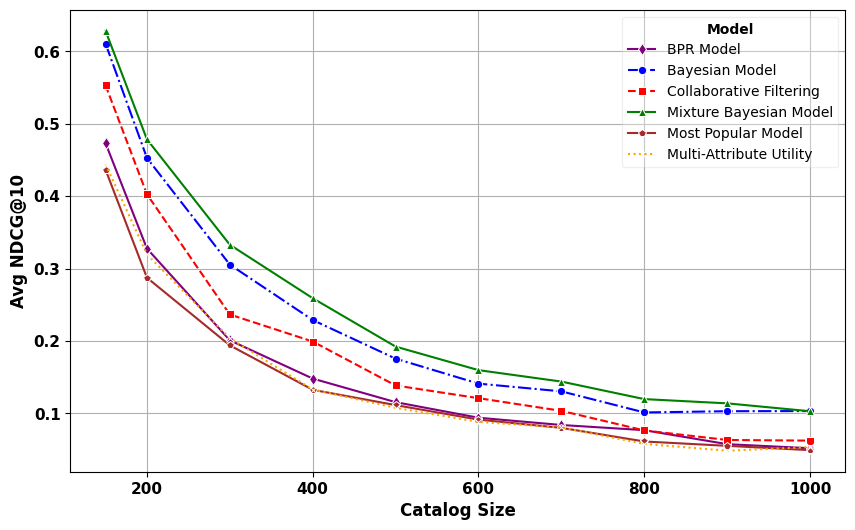

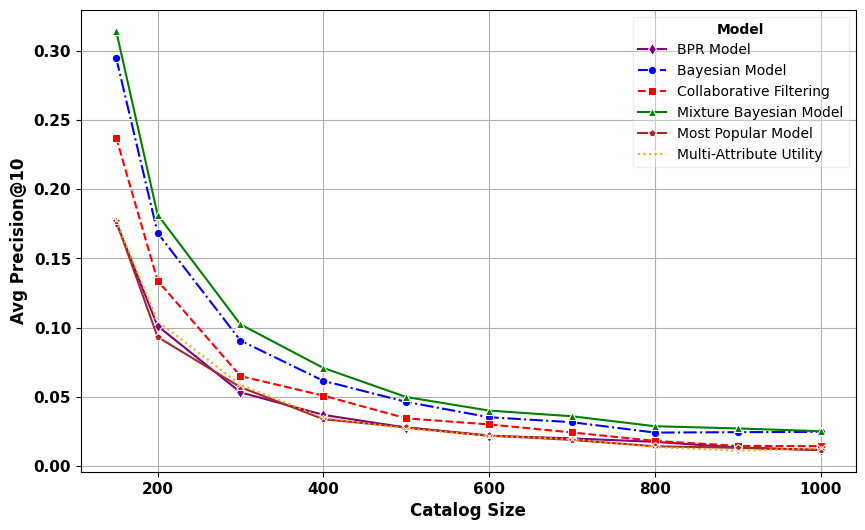

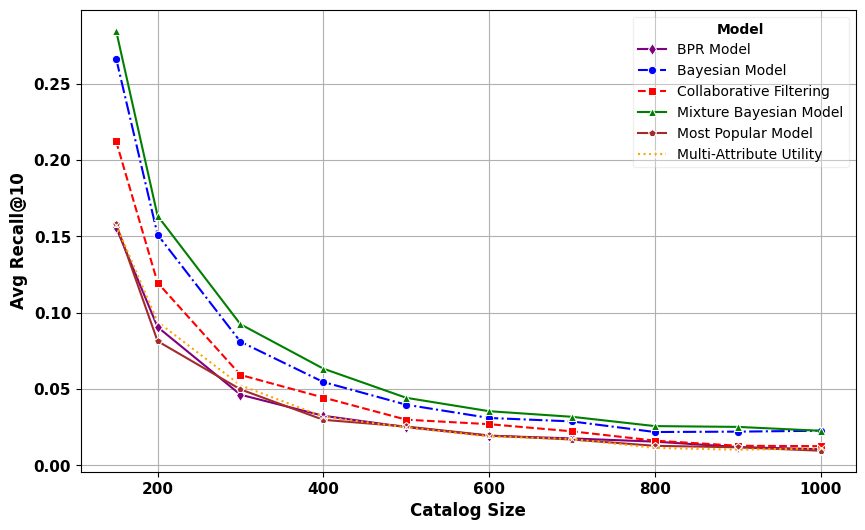

In [25]:
# Load the data
result_df = pd.read_csv(input_path_movie_size)

# Filter the DataFrame for the specific configuration
filtered_df = result_df[
    (result_df['randomness'] == 0.2) &
    (result_df['num_users'] == 1000) &
    (result_df['num_ratings_per_user'] == 100)
]

# Plotting function for NDCG, Precision, and Recall with saving option
def plot_metric(grouped_df, metric, ylabel, filename, xlabel):
    plt.figure(figsize=(10, 6))
    for model_name in grouped_df['model_name'].unique():
        model_df = grouped_df[grouped_df['model_name'] == model_name]
        line_style, marker_style = model_styles[model_name]
        sns.lineplot(
            data=model_df,
            x=xlabel,
            y=metric,
            label=model_labels[model_name],
            color=model_palette[model_name],
            linestyle=line_style,
            marker=marker_style
        )
    plt.xlabel('Catalog Size', fontweight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, fontweight='bold', fontsize = 12)

    # Update legend with bold fonts
    legend = plt.legend(title='Model')
    legend.get_frame().set_alpha(0.3)  # Set opacity to 70%

    # for text in legend.get_texts():
    #     text.set_fontweight('bold')
    legend.get_title().set_fontweight('bold')

    # Update ticks to be bold
    plt.xticks(fontweight='bold', fontsize = 11)
    plt.yticks(fontweight='bold', fontsize = 11)

    plt.grid(True)
    plt.savefig(save_path + 'figs/' + filename, format='jpg', dpi=300)  # Save the plot as a jpg file
    plt.show()
    plt.close()

xlabel = 'num_movies'
# Group by model_name and randomness, then calculate the average of NDCG, precision, and recall
grouped_df = filtered_df.groupby(['model_name', xlabel]).mean().reset_index()

# Plotting and saving the plots
plot_metric(grouped_df, 'test_ndcg', 'Avg NDCG@10', 'num_movies_sim_ndcg.jpg', xlabel)
plot_metric(grouped_df, 'test_precision', 'Avg Precision@10', 'num_movies_sim_precision.jpg', xlabel)
plot_metric(grouped_df, 'test_recall', 'Avg Recall@10', 'num_movies_sim_recall.jpg', xlabel)

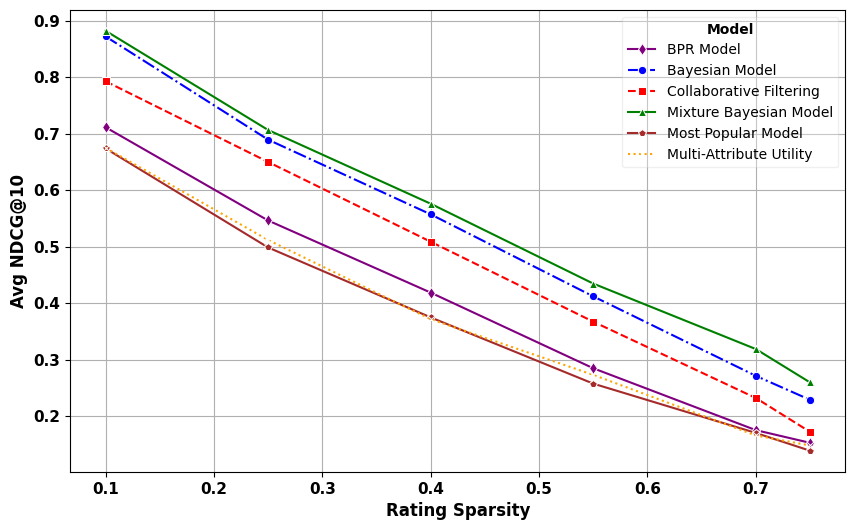

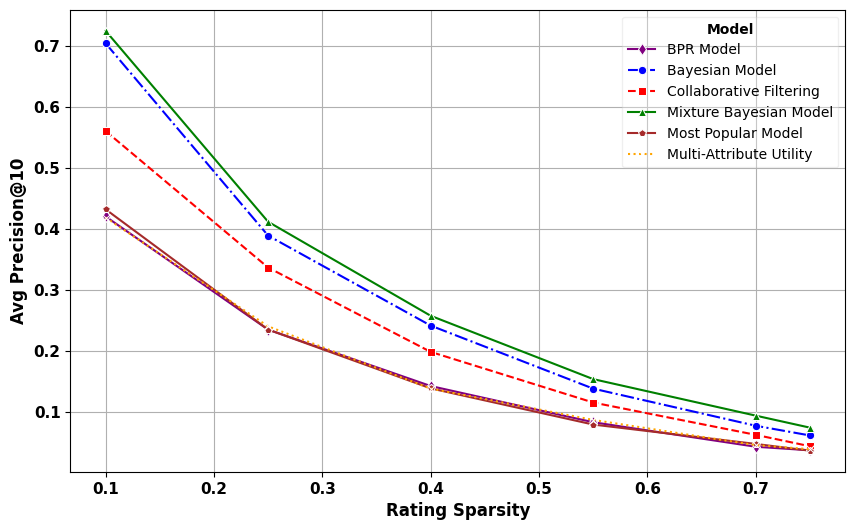

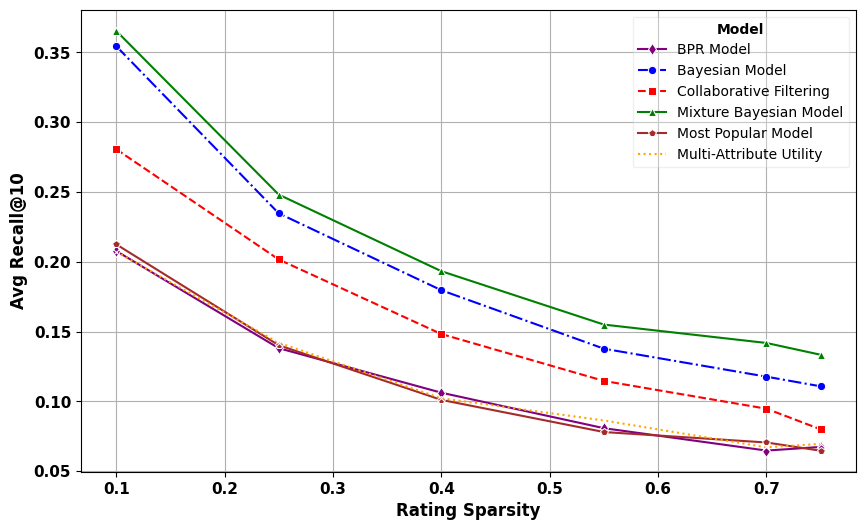

In [26]:
# Load the data
result_df = pd.read_csv(input_path_rating_num)

# Filter the DataFrame for the specific configuration
filtered_df = result_df[
    (result_df['num_movies'] == 200) &
    (result_df['num_users'] == 1000) &
    (result_df['randomness'] == 0.2)
]

# Compute the sparsity measure
filtered_df['sparsity'] = 1 - (filtered_df['num_ratings_per_user'] / 200)

# Plotting function for NDCG, Precision, and Recall with saving option
def plot_metric(grouped_df, metric, ylabel, filename, xlabel):
    plt.figure(figsize=(10, 6))
    for model_name in grouped_df['model_name'].unique():
        model_df = grouped_df[grouped_df['model_name'] == model_name]
        line_style, marker_style = model_styles[model_name]
        sns.lineplot(
            data=model_df,
            x=xlabel,
            y=metric,
            label=model_labels[model_name],
            color=model_palette[model_name],
            linestyle=line_style,
            marker=marker_style
        )
    plt.xlabel('Rating Sparsity', fontweight='bold', fontsize = 12)
    plt.ylabel(ylabel, fontweight='bold', fontsize = 12)

    # Update legend with bold fonts
    legend = plt.legend(title='Model')
    legend.get_frame().set_alpha(0.3)  # Set opacity to 70%

    # for text in legend.get_texts():
    #     text.set_fontweight('bold')
    legend.get_title().set_fontweight('bold')

    # Update ticks to be bold
    plt.xticks(fontweight='bold', fontsize = 11)
    plt.yticks(fontweight='bold', fontsize = 11)

    plt.grid(True)
    plt.savefig(save_path + 'figs/' + filename, format='jpg', dpi=300)  # Save the plot as a jpg file
    plt.show()
    plt.close()

# Update the xlabel to sparsity
xlabel = 'sparsity'

# Group by model_name and sparsity, then calculate the average of NDCG, precision, and recall
grouped_df = filtered_df.groupby(['model_name', xlabel]).mean().reset_index()

# Plotting and saving the plots
plot_metric(grouped_df, 'test_ndcg', 'Avg NDCG@10', 'sparsity_sim_ndcg.jpg', xlabel)
plot_metric(grouped_df, 'test_precision', 'Avg Precision@10', 'sparsity_sim_precision.jpg', xlabel)
plot_metric(grouped_df, 'test_recall', 'Avg Recall@10', 'sparsity_sim_recall.jpg', xlabel)

# Real Data Plots

In [31]:
datasets = ['MovieLens1M', 'Yelp', 'MovieLensSmall']
base_path = "/content/drive/MyDrive/data"

<ipython-input-32-28c3a2d939ed>:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels)


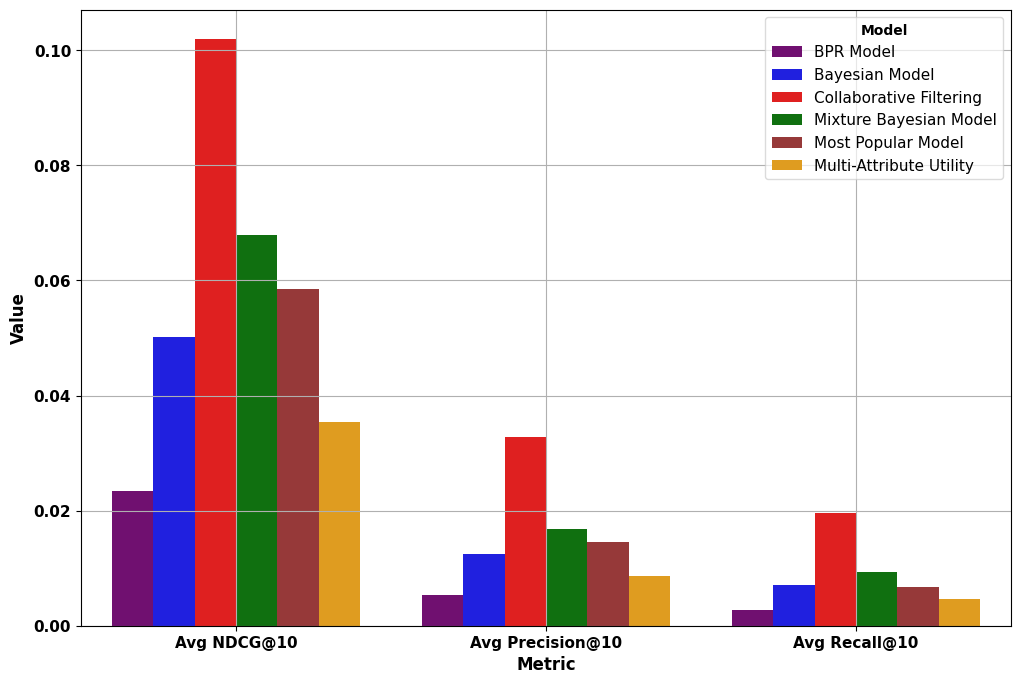

<ipython-input-32-28c3a2d939ed>:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels)


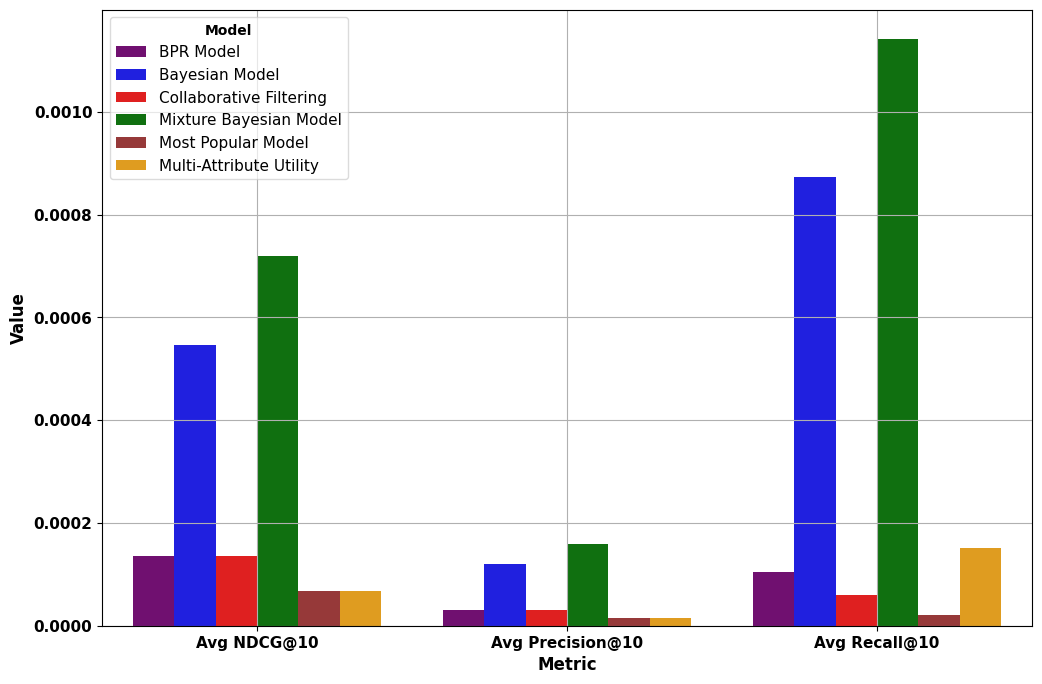

<ipython-input-32-28c3a2d939ed>:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels)


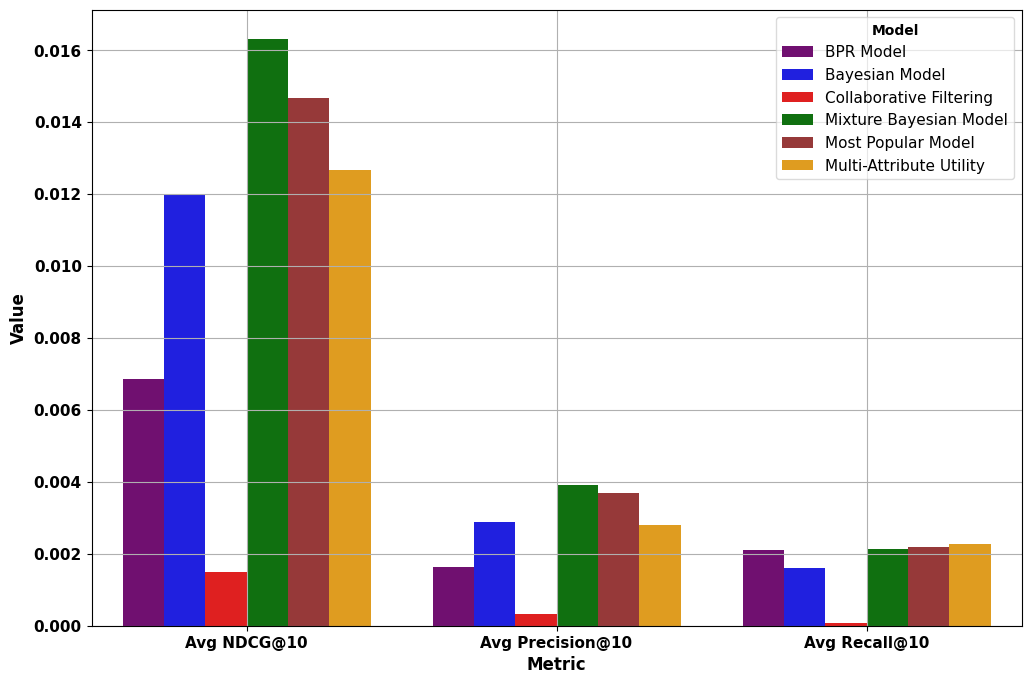

In [32]:
# Initialize an empty DataFrame to store all results
all_results_df = pd.DataFrame()

# Loop through each dataset and read the corresponding results
for dataset_name in datasets:
    output_file = save_path + f'{dataset_name}_results.csv'
    result_df = pd.read_csv(output_file)
    result_df['dataset_name'] = dataset_name  # Add a new column for the dataset name
    all_results_df = pd.concat([all_results_df, result_df], ignore_index=True)

# Calculate the average metrics for each model and dataset
grouped_df = all_results_df.groupby(['dataset_name', 'model_name']).mean().reset_index()

# Melt the DataFrame to make 'test_ndcg', 'test_precision', and 'test_recall' into a single column
melted_df = pd.melt(
    grouped_df,
    id_vars=['dataset_name', 'model_name'],
    value_vars=['test_ndcg', 'test_precision', 'test_recall'],
    var_name='metric',
    value_name='value'
)

# Define custom styles for each model, including MostPopularModel
model_styles = {
    'BayesianRecommendationModel': ('-.', 'o'),
    'CollaborativeFilteringModel': ('--', 's'),
    'MultiAttributeUtilityModel': (':', 'x'),
    'MixtureBetaRecommendationModel': ('-', '^'),
    'BPRModel': ('-', 'd'),
    'MostPopularModel': ('-', 'p')
}

model_palette = {
    'BayesianRecommendationModel': 'blue',
    'CollaborativeFilteringModel': 'red',
    'MultiAttributeUtilityModel': 'orange',
    'MixtureBetaRecommendationModel': 'green',
    'BPRModel': 'purple',
    'MostPopularModel': 'brown'
}

model_labels = {
    'BayesianRecommendationModel': 'Bayesian Model',
    'CollaborativeFilteringModel': 'Collaborative Filtering',
    'MultiAttributeUtilityModel': 'Multi-Attribute Utility',
    'MixtureBetaRecommendationModel': 'Mixture Bayesian Model',
    'BPRModel': 'BPR Model',
    'MostPopularModel': 'Most Popular Model'
}

# Function to create bar plots for each dataset with updated x-axis labels
def plot_metric_bar(melted_df, dataset_name, filename):
    # Mapping the metric names to more descriptive labels
    metric_labels = {
        'test_ndcg': 'Avg NDCG@10',
        'test_precision': 'Avg Precision@10',
        'test_recall': 'Avg Recall@10'
    }

    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=melted_df[melted_df['dataset_name'] == dataset_name],
        x='metric',
        y='value',
        hue='model_name',
        palette=model_palette
    )

    # Apply the updated labels to the x-axis
    plt.xlabel('Metric', fontweight='bold', fontsize=12)
    plt.ylabel('Value', fontweight='bold', fontsize=12)
    # plt.title(f'Model Performance on {dataset_name}', fontweight='bold', fontsize=14)

    # Update legend to use model labels instead of model names directly
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [model_labels[label] for label in labels]
    legend = plt.legend(handles, labels, title='Model', fontsize=11)
    legend.get_frame().set_alpha(0.7)  # Set opacity to 70%

    # Update legend and ticks to be bold
    legend.get_title().set_fontweight('bold')
    plt.xticks(fontweight='bold', fontsize=11)
    plt.yticks(fontweight='bold', fontsize=11)

    # Apply the updated x-axis labels
    current_labels = plt.gca().get_xticklabels()
    new_labels = [metric_labels[label.get_text()] for label in current_labels]
    plt.gca().set_xticklabels(new_labels)

    plt.grid(True)
    plt.savefig(save_path + 'figs/' + filename, format='jpg', dpi=300)  # Save the plot as a jpg file
    plt.show()
    plt.close()


# Create bar plots for each dataset
for dataset_name in datasets:
    plot_metric_bar(melted_df, dataset_name, f'{dataset_name}_performance_comparison.jpg')

In [ ]:
# Loop through each dataset and model in the grouped dataframe
for dataset_name in datasets:
    print(f"Dataset: {dataset_name}\n")
    dataset_df = grouped_df[grouped_df['dataset_name'] == dataset_name]

    # Find the best and second-best models for each metric
    best_precision = dataset_df['test_precision'].max()
    second_best_precision = dataset_df['test_precision'].nlargest(2).iloc[-1]

    best_recall = dataset_df['test_recall'].max()
    second_best_recall = dataset_df['test_recall'].nlargest(2).iloc[-1]

    best_ndcg = dataset_df['test_ndcg'].max()
    second_best_ndcg = dataset_df['test_ndcg'].nlargest(2).iloc[-1]

    # Since F1 might not be precomputed, we'll calculate it for best and second-best as well
    dataset_df['f1_score'] = dataset_df.apply(lambda row: 200 * (row['test_precision'] * row['test_recall']) / (row['test_precision'] + row['test_recall']) if (row['test_precision'] + row['test_recall']) > 0 else 0.0, axis=1)
    best_f1 = dataset_df['f1_score'].max()
    second_best_f1 = dataset_df['f1_score'].nlargest(2).iloc[-1]

    for model_name in model_labels.keys():
        model_row = dataset_df[dataset_df['model_name'] == model_name]

        if not model_row.empty:
            precision = model_row['test_precision'].values[0] * 100
            recall = model_row['test_recall'].values[0] * 100
            ndcg = model_row['test_ndcg'].values[0] * 100
            f1 = model_row['f1_score'].values[0]  # F1 was calculated above

            # Format precision
            if precision == best_precision * 100:
                precision_str = f"\\textbf{{{precision:.4f}}}"
            elif precision == second_best_precision * 100:
                precision_str = f"\\textit{{{precision:.4f}}}"
            else:
                precision_str = f"{precision:.4f}"

            # Format recall
            if recall == best_recall * 100:
                recall_str = f"\\textbf{{{recall:.4f}}}"
            elif recall == second_best_recall * 100:
                recall_str = f"\\textit{{{recall:.4f}}}"
            else:
                recall_str = f"{recall:.4f}"

            # Format NDCG
            if ndcg == best_ndcg * 100:
                ndcg_str = f"\\textbf{{{ndcg:.4f}}}"
            elif ndcg == second_best_ndcg * 100:
                ndcg_str = f"\\textit{{{ndcg:.4f}}}"
            else:
                ndcg_str = f"{ndcg:.4f}"

            # Format F1
            if f1 == best_f1:
                f1_str = f"\\textbf{{{f1:.4f}}}"
            elif f1 == second_best_f1:
                f1_str = f"\\textit{{{f1:.4f}}}"
            else:
                f1_str = f"{f1:.4f}"

            # Print the row
            print(f"{model_labels[model_name]:<25} & {precision_str} & {recall_str} & {ndcg_str} & {f1_str} \\\\")

    print("\hline \n" + "-" * 40 + "\n")


Dataset: MovieLens1M

Bayesian Model            & 1.2434 & 0.6991 & 5.0201 & 0.8950 \\
Collaborative Filtering   & \textbf{3.2814} & \textbf{1.9516} & \textbf{10.1953} & \textbf{2.4475} \\
Multi-Attribute Utility   & 0.8642 & 0.4642 & 3.5332 & 0.6039 \\
Mixture Beta Model        & \textit{1.6803} & \textit{0.9418} & \textit{6.7846} & \textit{1.2070} \\
BPR Model                 & 0.5315 & 0.2795 & 2.3449 & 0.3663 \\
Most Popular Model        & 1.4520 & 0.6706 & 5.8587 & 0.9175 \\
\hline 
----------------------------------------

Dataset: Yelp

Bayesian Model            & \textit{0.0120} & \textit{0.0872} & \textit{0.0547} & \textit{0.0211} \\
Collaborative Filtering   & 0.0030 & 0.0060 & 0.0137 & 0.0040 \\
Multi-Attribute Utility   & 0.0015 & 0.0150 & 0.0068 & 0.0027 \\
Mixture Beta Model        & \textbf{0.0158} & \textbf{0.1142} & \textbf{0.0719} & \textbf{0.0278} \\
BPR Model                 & 0.0030 & 0.0105 & 0.0137 & 0.0047 \\
Most Popular Model        & 0.0015 & 0.0021 & 0.0068 

<ipython-input-96-ec1baa4f21ad>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['f1_score'] = dataset_df.apply(lambda row: 200 * (row['test_precision'] * row['test_recall']) / (row['test_precision'] + row['test_recall']) if (row['test_precision'] + row['test_recall']) > 0 else 0.0, axis=1)
<ipython-input-96-ec1baa4f21ad>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['f1_score'] = dataset_df.apply(lambda row: 200 * (row['test_precision'] * row['test_recall']) / (row['test_precisio